In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [36]:
image_path = '/content/drive/MyDrive/ML/Seg Dataset'

In [37]:
import os

image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.gif')


for file in os.listdir(image_path):
  if(file.lower().endswith(image_extensions)):
    print(file)



peppers.jpg
lung.jpg
blur_tiger.png
xray.tif
retina.jpg


In [38]:
image_files = [file for file in os.listdir(image_path) if file.lower().endswith(image_extensions)]

print(image_files)
print(f"Number of images in the directory: {len(image_files)}")

['peppers.jpg', 'lung.jpg', 'blur_tiger.png', 'xray.tif', 'retina.jpg']
Number of images in the directory: 5


In [39]:
blur_tiger= '/content/drive/MyDrive/ML/Seg Dataset/blur_tiger.png'

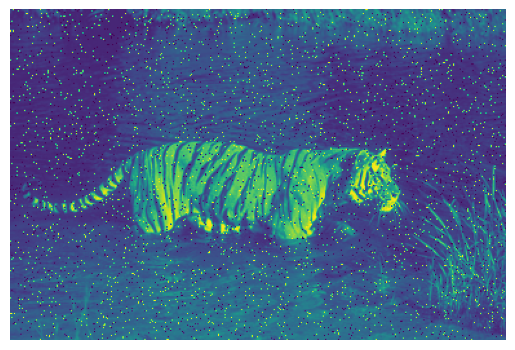

In [40]:
from PIL import Image
import matplotlib.pyplot as plt


image = Image.open(blur_tiger)


plt.imshow(image)
plt.axis('off')
plt.show()


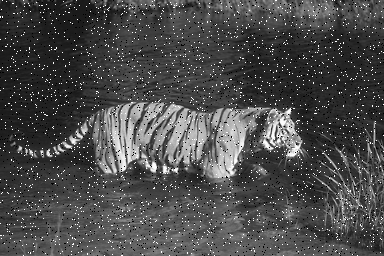

In [41]:
image

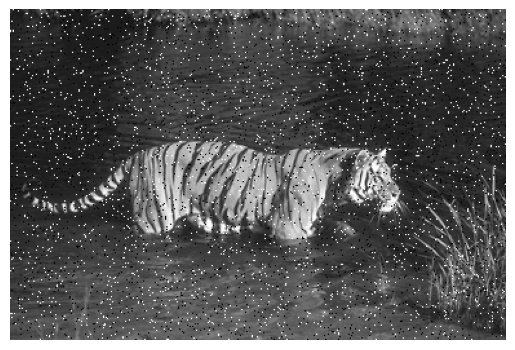

In [42]:
from PIL import Image
import matplotlib.pyplot as plt


image = Image.open(blur_tiger)
#image = Image.open(blur_tiger).convert('L')      # if the image  is not in gray scale it will convert to gray scale

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

<font color= "yellow"> <b> Removing noise

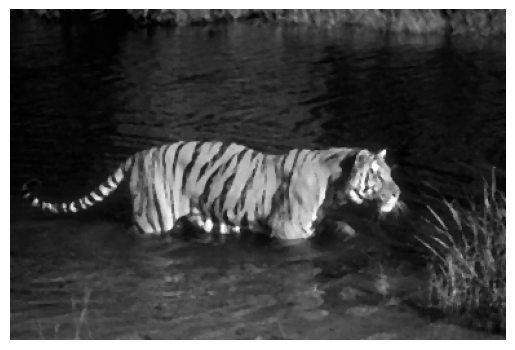

In [43]:
import numpy as np
from scipy.ndimage import median_filter


image_array = np.array(image)     # convert image to numpy array

filtered_image_array = median_filter(image_array, size=3)   # use median filter

filtered_image = Image.fromarray(filtered_image_array)    # convert the numpy array to image


plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

<font color="yellow"> <b> Thresholding

In [44]:
xray= '/content/drive/MyDrive/ML/Seg Dataset/xray.tif'

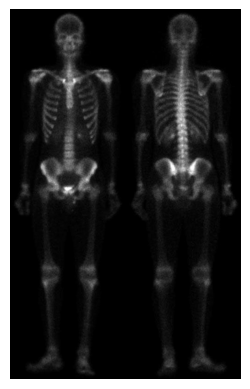

In [45]:
image = Image.open(xray).convert('F')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [46]:
image_array = np.array(image)
print(image_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
threshold = 0.5  # You can adjust this value


binary_image_array = (image_array > threshold).astype(np.float32)

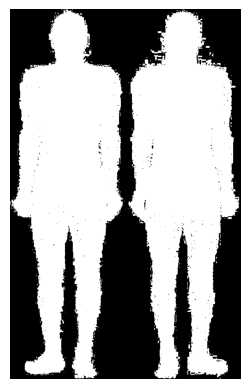

In [50]:
plt.imshow(binary_image_array, cmap='gray')
plt.axis('off')
plt.show()

<font color= "yellow"> <b> Contrast Stretching

In [52]:
image = Image.open(xray).convert('F')

image_array = np.array(image)


min_val = np.min(image_array)  # Minimum value in the image
max_val = np.max(image_array)  # Maximum value in the image


stretched_image_array = (image_array - min_val) / (max_val - min_val)   # Stretch contrast

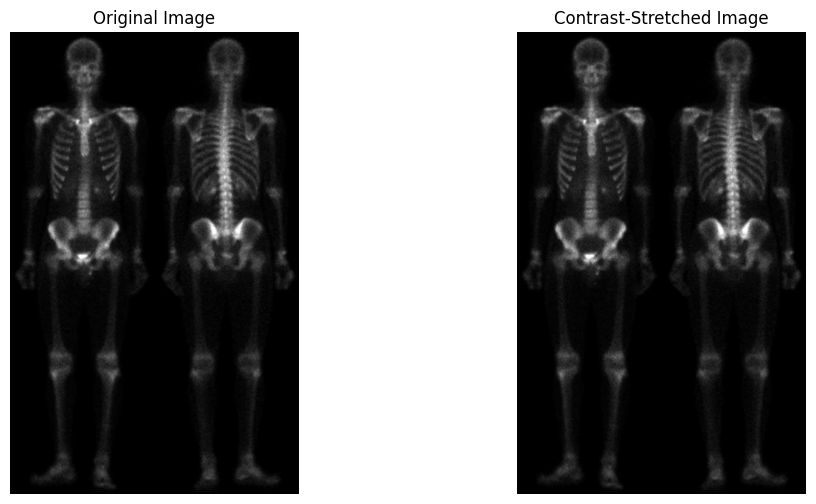

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Original image
axs[0].imshow(image, cmap='gray', vmin=0, vmax=1)
axs[0].axis('off')
axs[0].set_title('Original Image')

# Contrast-stretched image
axs[1].imshow(stretched_image_array, cmap='gray', vmin=0, vmax=1)
axs[1].axis('off')
axs[1].set_title('Contrast-Stretched Image')

plt.show()

Seems like this amount of contrast stretching is not working well

In [54]:

contrast_stretch_factor = 3.0  # Adjust this factor to increase contrast

stretched_image_array = np.clip((image_array - min_val) * contrast_stretch_factor / (max_val - min_val), 0, 1)

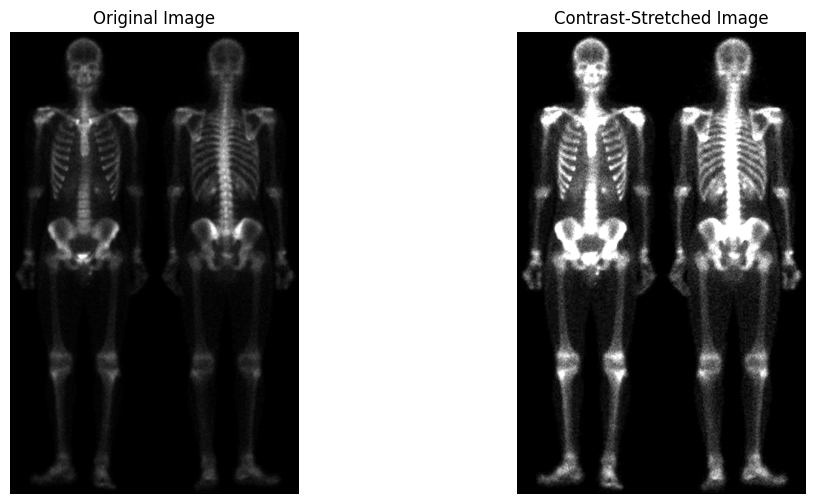

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Original image
axs[0].imshow(image, cmap='gray', vmin=0, vmax=1)
axs[0].axis('off')
axs[0].set_title('Original Image')

# Contrast-stretched image
axs[1].imshow(stretched_image_array, cmap='gray', vmin=0, vmax=1)
axs[1].axis('off')
axs[1].set_title('Contrast-Stretched Image')

plt.show()

<font color= "yellow"> <b> Edge Detection

In [56]:
fruits= '/content/drive/MyDrive/ML/Seg Dataset/peppers.jpg'

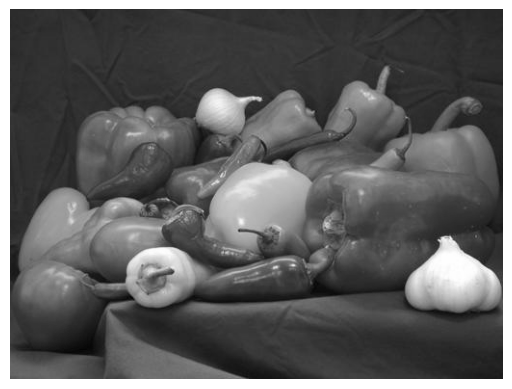

In [57]:
image = Image.open(fruits).convert('F')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [59]:
image = cv2.imread(fruits, cv2.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Magnitude of the gradient

# Canny Edge Detection
edges_canny = cv2.Canny(image, 100, 200)  # Set threshold values for edge detection

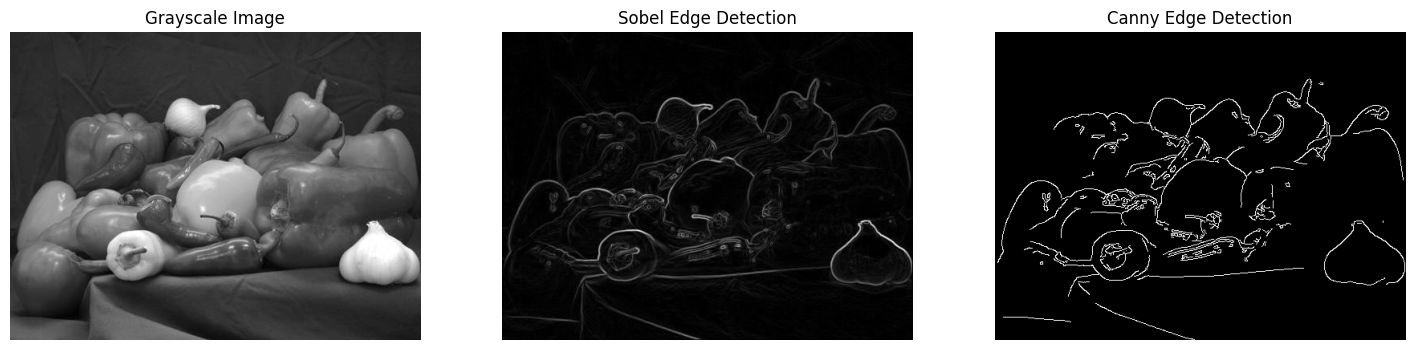

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original grayscale image
axs[0].imshow(image, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Grayscale Image')

# Sobel Edge Detection result
axs[1].imshow(sobel_combined, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Sobel Edge Detection')

# Canny Edge Detection result
axs[2].imshow(edges_canny, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Canny Edge Detection')

plt.show()

<font color ="yellow"> Extraction

In [61]:
retina= '/content/drive/MyDrive/ML/Seg Dataset/retina.jpg'

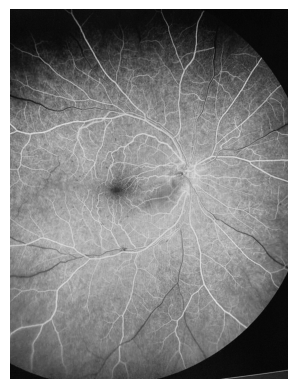

In [62]:
image = Image.open(retina).convert('F')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [67]:
import cv2
from skimage import filters, morphology, exposure

# Read the image
im = cv2.imread(retina)
gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Convert to float and normalize the image
gray_im = gray_im.astype(np.float32) / 255.0

# Binarization
threshold = 0.8
originalBW = gray_im > threshold

# Define structuring element (diamond shape)
SE = morphology.diamond(1)

# Morphological operations
# Dilation
BW2 = morphology.dilation(originalBW, footprint=SE)

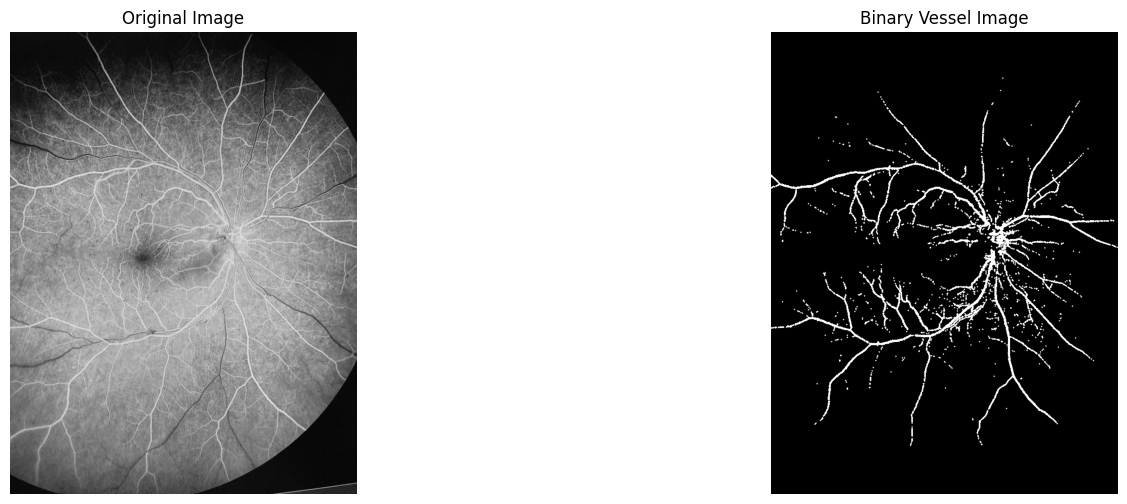

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Original image
axs[0].imshow(image, cmap='gray', vmin=0, vmax=1)
axs[0].axis('off')
axs[0].set_title('Original Image')


# Binary vessel image
axs[1].imshow(BW2, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Binary Vessel Image')

plt.show()